In [6]:
from torchvision.utils import save_image
# helper.latent_rand_to_img(pick_model, rand_tensor)
from matplotlib import pyplot as plt
import numpy as np
from torchvision.utils import make_grid
from MyDataSet import MyDataSets_Subset_4_9
from matplotlib import pyplot as plt
import numpy as np
import torch
import model
import helper

pick_model = model.VaeFinal_only_one_hidden()
pick_model = helper.import_model_name(model_x=pick_model, activate_eval=True)
pick_2_classifier = model.MyModel5_retry_2classes_faster_4()
pick_2_classifier = helper.import_model_name(model_x=pick_2_classifier, activate_eval=True)

import MyDataSet

#
# _testset_full = datasets.MNIST(root='data/testset', train=False, transform=transforms.ToTensor(),
#                                        download=True)
dataset_test_4 = MyDataSet.MyDataSets_Subset_4(batch_size_train=10)
dataset_test_9 = MyDataSet.MyDataSets_Subset_9(batch_size_train=10)
datasetbatch_4 = next(iter(dataset_test_4.test_loader_subset_changed_labels))
datasetbatch_9 = next(iter(dataset_test_9.test_loader_subset_changed_labels))

img_to_test = datasetbatch_4[0]
label_predicted = pick_2_classifier(img_to_test)
z_rec = pick_model.encode(img_to_test)
index = 5

size = label_predicted.shape[0]
class_0_or_1_prediction = label_predicted[index].argmax(dim=0)
#pick anz numbet

print(f'{size = }')
print(f'{label_predicted[index] = }')
print(f'{label_predicted[index].argmax(dim=0) = }')
print(f'{z_rec[0][index] = }')

if int(class_0_or_1_prediction[index]) == 0:
    print('class is 0')


MyDataSets.MyDataSets_Subset_4.__init__
MyDataSets.MyDataSets_Subset_9.__init__
size = 982
label_predicted[index] = tensor([-1.6515,  1.8485], grad_fn=<SelectBackward0>)
label_predicted[index].argmax(dim=0) = tensor(1)
z_rec[0][index] = tensor([-0.2663, -0.7013], grad_fn=<SelectBackward0>)


IndexError: index 5 is out of bounds for dimension 0 with size 0

tensor([[-3.2488,  0.5433]])


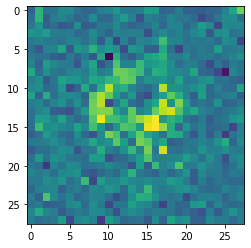

In [7]:
import helper  # model_loaded = model.VaeMe_500_hidden()
import model
import torch

# pick_model = model.pick_model = model.VaeFinal_only_one_hidden()
pick_model = model.pick_model = model.VaeFinal_only_one_hidden_copy()
pick_model = helper.import_model_name(model_x=pick_model, activate_eval=True)

max = 4
min = -4
rand_tensor = (max - min) * torch.rand((1, 2)) + min
print(rand_tensor)

helper.latent_rand_to_img(pick_model, rand_tensor)

MyDataSets.MyDataSets_Subset_4_9.__init__
Original Images


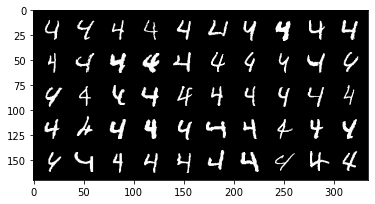

Reconstructions


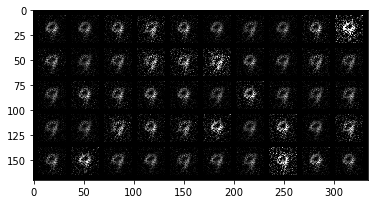

tensor([[ 0.6918, -0.0812],
        [-0.9146,  0.8599],
        [ 0.5042,  0.2983],
        ...,
        [ 0.6866,  0.0696],
        [-1.0761,  2.3813],
        [ 1.1431, -0.5715]])
Reconstructions


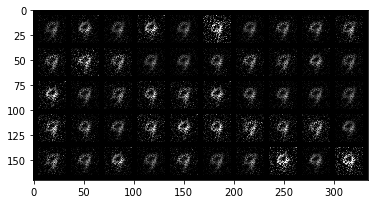

In [8]:
from matplotlib import pyplot as plt
import numpy as np
from torchvision.utils import make_grid
from MyDataSet import MyDataSets_Subset_4_9
from matplotlib import pyplot as plt
import numpy as np
import torch

# Display original images
mydatasets_subset_4_9 = MyDataSets_Subset_4_9(batch_size_train=10000)

test_images_org, _ = mydatasets_subset_4_9.dataloader_test_subset_one_batch()
test_images_copy = test_images_org.clone()
test_images_copy_dec_end = test_images_org.clone()
with torch.no_grad():
    print("Original Images")
    test_images = test_images_copy.cpu()
    test_images = test_images.clamp(0, 1)
    test_images = test_images[:50]
    test_images = make_grid(test_images, 10, 5)
    test_images = test_images.numpy()
    test_images = np.transpose(test_images, (1, 2, 0))
    plt.imshow(test_images)
    plt.show()

# Display reconstructed images
import helper  # model_loaded = model.VaeMe_500_hidden()
import model
import torch

pick_model = model.VaeFinal_only_one_hidden_copy()
pick_model = helper.import_model_name(model_x=pick_model, activate_eval=True)
# print(test_images_org.shape)
reconstructions, mu, sigma = pick_model(test_images_copy_dec_end)
# print(reconstructions)
with torch.no_grad():
    print("Reconstructions")
    reconstructions = reconstructions.view(reconstructions.size(0), 1, 28, 28)
    reconstructions = reconstructions.cpu()
    reconstructions = reconstructions.clamp(0, 1)
    reconstructions = reconstructions[:50]
    plt.imshow(np.transpose(make_grid(reconstructions, 10, 5).numpy(), (1, 2, 0)))
    plt.show()

eps = torch.randn_like(sigma)  # == torch.randn_like(mu) == torch.randn_like(sigma)
print(eps)
# eps[:] = -10
z = mu + sigma * eps
new_enc_dec = pick_model.decode(z)

# eps = torch.rand_like(encoded[:,0])
# print(f'{eps.shape = }')
# print(f'{encoded.shape = }')
# print(f'{encoded[0].shape = }')
# print(f'{encoded[1].shape = }')
# recon_with_vae = torch.asarray((encoded[:,0] , encoded[:,1] * eps))
# recon_with_vae = encoded.clone()
# recon_with_vae[:,1] = encoded[:,1] * eps
# print(f'{recon_with_vae.shape = }')
# recon_with_vae_model = pick_model.decode(recon_with_vae)
# print(reconstructions)
with torch.no_grad():
    print("Reconstructions")
    reconstructions = new_enc_dec.view(new_enc_dec.size(0), 1, 28, 28)
    reconstructions = reconstructions.cpu()
    reconstructions = reconstructions.clamp(0, 1)
    reconstructions = reconstructions[:50]
    plt.imshow(np.transpose(make_grid(reconstructions, 10, 5).numpy(), (1, 2, 0)))
    plt.show()

tensor([[-1.9666, -0.5233],
        [-1.1798, -0.2320],
        [ 0.7103, -0.4515],
        ...,
        [ 0.5312,  0.5678],
        [ 1.3079, -0.1734],
        [-0.7963,  0.7857]])
z[:5] = tensor([[-0.0085,  0.0090],
        [ 0.0128, -0.0039],
        [-0.0121,  0.0096],
        [ 0.0063, -0.0052],
        [ 0.0017, -0.0063]], grad_fn=<SliceBackward0>)
Reconstructions
reconstructions.shape = torch.Size([50, 1, 28, 28])
reconstructions.shape = torch.Size([5, 1, 28, 28])


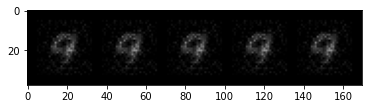

In [9]:
eps = torch.randn_like(sigma)  # == torch.randn_like(mu) == torch.randn_like(sigma)
print(eps)
eps = 0
# eps[:] = -10
z = mu + sigma * eps
print(f'{z[:5] = }')
new_enc_dec_counter = pick_model.decode(z)
# print(f'{new_enc_dec_counter[0] = }')
with torch.no_grad():
    print("Reconstructions")
    print(f'{reconstructions.shape = }')

    reconstructions = new_enc_dec_counter.view(new_enc_dec_counter.size(0), 1, 28, 28)
    # print(f'{reconstructions.shape = }')
    # reconstructions = reconstructions.cpu()
    # print(f'{reconstructions.shape = }')

    reconstructions = reconstructions.clamp(0, 1)
    # print(f'{reconstructions.shape = }')
    # print(f'{reconstructions = }')

    reconstructions = reconstructions[:5]
    print(f'{reconstructions.shape = }')

    plt.imshow(np.transpose(make_grid(reconstructions, 10, 5).numpy(), (1, 2, 0)))
    plt.show()

MyDataSets.MyDataSets_Subset_4.__init__
MyDataSets.MyDataSets_Subset_9.__init__
label_predicted = tensor([[ 1.4461, -1.6031],
        [ 2.3473, -2.3681],
        [ 1.9672, -1.7770],
        ...,
        [ 2.4960, -2.6790],
        [ 1.0648, -0.8346],
        [ 3.1142, -3.0123]], grad_fn=<AddmmBackward0>)
class is 0
class is "4"


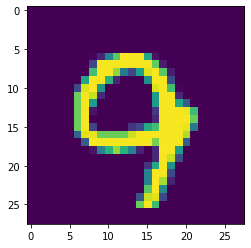

In [3]:
from torchvision.utils import save_image
# helper.latent_rand_to_img(pick_model, rand_tensor)
from matplotlib import pyplot as plt
import numpy as np
from torchvision.utils import make_grid
from MyDataSet import MyDataSets_Subset_4_9
from matplotlib import pyplot as plt
import numpy as np
import torch
import model
import helper

pick_model = model.VaeFinal_only_one_hidden_copy()
pick_model = helper.import_model_name(model_x=pick_model, activate_eval=True)
pick_2_classifier = model.MyModel5_retry_2classes_faster_4()
pick_2_classifier = helper.import_model_name(model_x=pick_2_classifier, activate_eval=True)

import MyDataSet

#
# _testset_full = datasets.MNIST(root='data/testset', train=False, transform=transforms.ToTensor(),
#                                        download=True)
dataset_test_4 = MyDataSet.MyDataSets_Subset_4(batch_size_train=10)
dataset_test_9 = MyDataSet.MyDataSets_Subset_9(batch_size_train=10)
datasetbatch_4 = next(iter(dataset_test_4.test_loader_subset_changed_labels))
datasetbatch_9 = next(iter(dataset_test_9.test_loader_subset_changed_labels))

counter4 = datasetbatch_4[0]
counter9 = datasetbatch_9[0]

img_to_test = datasetbatch_4[0]
# img_to_test = datasetbatch_9[0]
label_predicted = pick_2_classifier(img_to_test)
print(f'{label_predicted = }')
z_rec = pick_model.encode(img_to_test)
index = 5

size = label_predicted.shape[0]
class_0_or_1_prediction = label_predicted.argmax(dim=1)
# print(f'{class_0_or_1_prediction = }')

# fig, axes = plt.subplot()
images_testing = img_to_test[index]
counter_image = []
if int(class_0_or_1_prediction[index]) == 0:
    print('class is 0')
    print('class is "4"')
    counter_image = counter9[index]
if int(class_0_or_1_prediction[index]) == 1:
    print('class is 1')
    print('class is "9"')
    counter_image = counter4[index]

plt.imshow(img_to_test[index, 0, :, :])
plt.imshow(counter_image[0, :, :])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Reconstructions
tensor([[[[ 1.8286e-04, -2.8393e-04,  1.4640e-03,  3.3165e-04,  5.8396e-04,
            5.7675e-04, -2.2592e-05, -1.5506e-03,  4.0038e-03,  1.6475e-04,
           -3.3268e-03,  3.2654e-03, -7.8099e-04,  3.7198e-04, -1.9711e-04,
            7.9697e-04,  2.1365e-03, -1.6947e-03,  1.1127e-03, -1.0057e-03,
            3.6736e-03, -7.9603e-05, -5.3174e-04, -3.8419e-05, -8.3792e-04,
            1.1710e-03,  3.9372e-04,  1.4568e-03],
          [ 1.0172e-04, -1.4887e-03, -8.7755e-04,  2.9447e-04,  2.3234e-03,
            6.3644e-04, -3.8185e-04,  1.7262e-03, -1.8107e-03, -9.4424e-04,
            1.1782e-03, -8.7503e-04,  5.8718e-04, -2.4753e-04, -8.4236e-04,
            5.3743e-04,  1.1799e-03, -5.3466e-04, -7.0018e-04,  2.8200e-03,
           -3.4731e-05,  2.2847e-03, -8.2036e-04, -1.4524e-03, -9.2884e-04,
            1.8232e-03,  2.3815e-03,  1.1958e-04],
          [-2.3325e-04, -2.2000e-03,  4.8422e-04, -1.6828e-03,  9.9486e-04,
           -1.3020e-03, -5.3225e-04,  9.5833e-

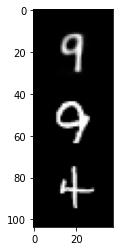

In [4]:
from pathlib import Path

PATH_SAVE_IMAGES = '/Users/dominikocsofszki/PycharmProjects/mlp/counterfactuals/save_img'
path = Path(PATH_SAVE_IMAGES)
with torch.no_grad():
    reconstructions = pick_model(counter_image)[0]

    print("Reconstructions")
    reconstructions = reconstructions.view(reconstructions.size(0), 1, 28, 28)
    reconstructions = reconstructions.cpu()
    print(reconstructions)
    print(reconstructions)

    print(reconstructions.shape, counter_image.shape, images_testing.shape)
    grid = make_grid(tensor=[reconstructions[0], counter_image, images_testing], nrow=1, padding=5)
    # plt.imshow(np.transpose(make_grid(tensor=[reconstructions[0],counter_image,images_testing],nrow= 1, padding=5,normalize=True).numpy(), (1, 2, 0)))
    plt.imshow(np.transpose(grid.numpy(), (1, 2, 0)))
    # plt.imshow(np.transpose(grid.numpy(), (1, 2, 0)))
    # plt.imshow(np.transpose(make_grid([reconstructions[0],images_testing], 10, 5).numpy(), (1, 2, 0)))
    #
    plt.show()
    save_image(tensor=grid, fp=path / 'a.png')

with torch.no_grad():
    pass

In [5]:
def decode_output_to_image_format(z_rec):
    tmp = z_rec[0, :]
    # print(tmp.shape)
    # return z.reshape(z_rec.shape[0],28,28)
    return tmp.reshape(z_rec.shape[0], 28, 28)


def print_grid(images):
    if isinstance(images, tuple):
        # if isinstance(images,list):
        images = [torch.tensor(decode_output_to_image_format(x)) for x in images]
        print('    if isinstance(images,tuple):')
    with torch.no_grad():
        # reconstructions = pick_model(counter_image)[0]
        #
        # print("Reconstructions")
        # reconstructions = reconstructions.view(reconstructions.size(0), 1, 28, 28)
        # reconstructions = reconstructions.cpu()
        # print(reconstructions)
        # print(reconstructions)
        images = [torch.tensor(decode_output_to_image_format(x)) for x in images]
        # images = images.view(-1,1,28,28)
        # resize_images = images.view(28,28)
        # grid = make_grid(tensor=resize_images,nrow= 5, padding=5)

        # print(reconstructions.shape,counter_image.shape,images_testing.shape)
        # grid = make_grid(tensor=[reconstructions[0],counter_image,images_testing],nrow= 1, padding=5)

        grid = make_grid(tensor=images, nrow=5, padding=5)

        # plt.imshow(np.transpose(make_grid(tensor=[reconstructions[0],counter_image,images_testing],nrow= 1, padding=5,normalize=True).numpy(), (1, 2, 0)))
        plt.imshow(np.transpose(grid.numpy(), (1, 2, 0)))
        # plt.imshow(np.transpose(make_grid([reconstructions[0],images_testing], 10, 5).numpy(), (1, 2, 0)))
        plt.show()
        # save_image(tensor = grid,fp = path/'a.png')


/var/folders/82/f7qw1z6s56j4rk85z0173v7r0000gn/T/ipykernel_40949/2153436462.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  images = [torch.tensor(decode_output_to_image_format(x)) for x in images]


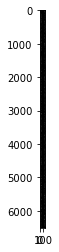

In [6]:
images = datasetbatch_4[:1][0]
# print_grid(images=datasetbatch_4[0][:1])
print_grid(images=images)

In [7]:
def generate_diff_img(image_rec, mu, sigma):
    with torch.no_grad():
        eps = torch.randn_like(sigma)
        z = mu + sigma * eps
        img_reconstructed = pick_model.decode(z)


def generate_x_images_of_one_image(images, nr_of_gen=5):
    # eps = torch.arange(start =-4,end=4,step =0.3)
    pick_model.eval()
    image_rec, mu, sigma = pick_model(images)
    print(f'{sigma = }')
    print(f'{mu = }')
    arr_with_z = []
    arr_rec_images = []
    tensor_rec_images = torch.empty(size=(nr_of_gen, 28 * 28))
    print(tensor_rec_images)
    print(tensor_rec_images.shape)
    for i in range(nr_of_gen):
        eps = torch.randn_like(input=sigma)
        print(f'{eps = }')
        z = mu + sigma * eps
        rec_image = pick_model.decode(z)
        print(f'{rec_image.shape = }')
        tensor_rec_images[i] = rec_image
        # arr_rec_images[:,i] = rec_image
    # print(arr_with_z)
    # print(arr_rec_images[0].shape)
    # x = [x.detach().numpy() for x in arr_rec_images]
    # y = torch.from_numpy(arr_rec_images)
    # print(x)
    # print_grid(images=x)
    print(f'{tensor_rec_images.shape = }')
    print_grid(images=tensor_rec_images)
    print(f'{image_rec = }')
    # print_grid(images=arr_rec_images)

    '''print(f'{image_rec.shape = }')
    images_rec_vect = torch.zeros(count)
    print(f'{images_rec_vect = }')
    images_rec_vect[:] = mu[0]
    print(f'{images_rec_vect = }')

    images_rec_vect.new_full((5,1), image_rec[0])
    print(images_rec_vect)
    print(f'{images_rec_vect.shape}')
    images_rec_vect[:count] = image_rec
    print(images_rec_vect)
    for _ in count:
        img_reconstructed = generate_diff_img(image_rec,mu,sigma)
'''


generate_x_images_of_one_image(images)


sigma = tensor([[-0.1765, -0.5820],
        [-0.1280, -0.6985],
        [-0.2307, -0.9271],
        ...,
        [-0.2099, -0.8900],
        [-0.1924, -0.7611],
        [-0.1621, -0.6779]], grad_fn=<AddmmBackward0>)
mu = tensor([[ 0.1499,  0.1511],
        [ 0.4966,  0.0915],
        [ 0.4136, -0.2232],
        ...,
        [ 0.7856,  0.3564],
        [ 0.3686, -0.3392],
        [ 0.7678, -0.2950]], grad_fn=<AddmmBackward0>)
tensor([[0.0000e+00, 0.0000e+00, 1.4013e-43,  ..., 0.0000e+00, 6.0000e-01,
         9.9608e-01],
        [9.9608e-01, 1.0000e+00, 9.9608e-01,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 6.7451e-01, 9.4902e-01,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 3.2549e-01,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.3030e-11, 8.2909e-33,
         1.3563e-19]])
torch.Size([5, 784])
eps = tensor([[ 0.9441, -1.4533],
        [ 0.1438, -1.1352],
  

RuntimeError: expand(torch.FloatTensor{[982, 784]}, size=[784]): the number of sizes provided (1) must be greater or equal to the number of dimensions in the tensor (2)

torch.Size([10, 1, 28, 28])


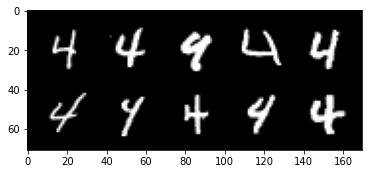

In [8]:
def decode_output_to_image_format(z_rec):
    tmp = z_rec[0, :]
    print(tmp.shape)
    # return z.reshape(z_rec.shape[0],28,28)
    return tmp.reshape(z_rec.shape[0], 28, 28)


def print_grid(images):
    if isinstance(images, tuple):
        images = [torch.tensor(decode_output_to_image_format(x)) for x in images]
        print('    if isinstance(images,tuple):')
    with torch.no_grad():
        grid = make_grid(tensor=images, nrow=5, padding=5)
        plt.imshow(np.transpose(grid.numpy(), (1, 2, 0)))
        plt.show()
        # save_image(tensor = grid,fp = path/'a.png')


# def return_new
img_4_batch, label_4_batch = next(iter(dataset_test_4.dataloader_test_subset()))
img_9_batch, label_9_batch = next(iter(dataset_test_9.dataloader_test_subset()))
X = next(iter(dataset_test_9.dataloader_test_subset()))
images = img_4_batch[:10]
print(images.shape)
print_grid(images=images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


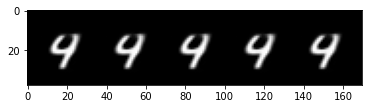

In [9]:
# def generate_diff_img(image_rec,mu,sigma) :
#     with torch.no_grad():
#         eps = torch.randn_like(sigma)
#         z = mu+ sigma * eps
#         img_reconstructed = pick_model.decode(z)

def generate_x_images_of_one_image(images, pick_model, nr_of_gen=5, factor=1):
    with torch.no_grad():
        image_rec, mu, sigma = pick_model(images)
        # print(f'{sigma = }')
        # print(f'{mu = }')
        eps = torch.randn(nr_of_gen, 2) * factor
        # print(f'{image_rec.shape = }')
        z = mu + sigma * eps
        # print(f'{z.shape = }')
        # print(f'{z = }')

        new_images = pick_model.decode(z)
        # print(f'{new_images.shape = }')
        print_grid(images=new_images.view(-1, 1, 28, 28))


img = img_4_batch[0, :, :, :]
# print_grid(images=img_4_batch[:1,:,:,:])
# print_grid(images=img)
pick_model = model.VaeFinal_only_one_hidden_copy()
pick_model = helper.import_model_name(model_x=pick_model, activate_eval=True)
img_counterfactuals = generate_x_images_of_one_image(images=img, nr_of_gen=5, pick_model=pick_model, factor=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


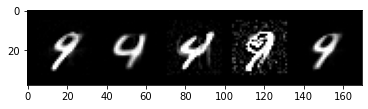

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


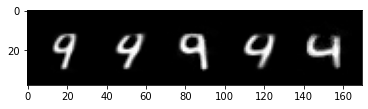

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


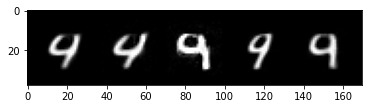

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


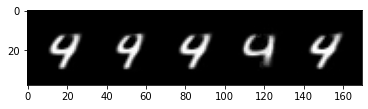

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


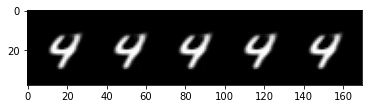

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


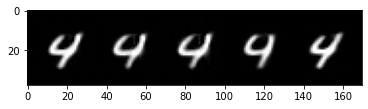

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


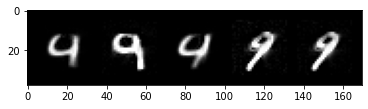

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


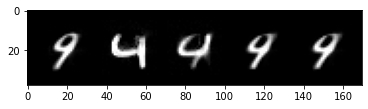

In [10]:
import model

pick_model = model.VaeFinal_only_one_hidden_copy()
# pick_model = model.VaeFinal_only_one_hidden_copy()
pick_model = helper.import_model_name(model_x=pick_model, activate_eval=True)
# for factor_step in range(-4,4) :
#     generate_x_images_of_one_image(images = img, nr_of_gen=10,pick_model = pick_model,factor=factor_step)
img_ = img_4_batch[1, :, :, :]
plt.imshow(img_[0, :, :])
for factor_step in range(-4, 4):
    generate_x_images_of_one_image(images=img_, nr_of_gen=5, pick_model=pick_model, factor=factor_step)

In [27]:
def decode_output_to_image_format(z_rec):
    tmp = z_rec[0, :]
    # print(tmp.shape)
    # return z.reshape(z_rec.shape[0],28,28)
    return tmp.reshape(z_rec.shape[0], 28, 28)


def print_grid_refactor(images):
    with torch.no_grad():
        # images = [torch.tensor(decode_output_to_image_format(x)) for x in images]
        grid = make_grid(tensor=images, nrow=5, padding=5, normalize=True, value_range=(0, 1))
        plt.imshow(np.transpose(grid.numpy(), (1, 2, 0)))
        plt.show()
        # save_image(tensor = grid,fp = path/'a.png')


tensor([[ 0.9166, -0.0172]])


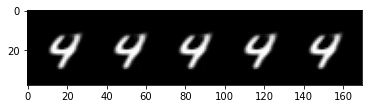

tensor([[ 0.9166, -0.0172]])


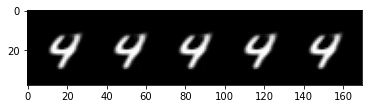

tensor([[ 0.9166, -0.0172]])


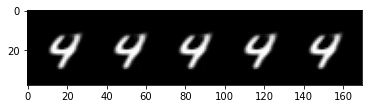

tensor([[ 0.9166, -0.0172]])


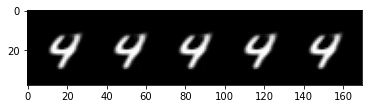

tensor([[ 0.9166, -0.0172]])


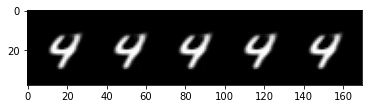

tensor([[ 0.9166, -0.0172]])


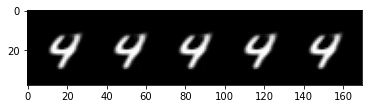

tensor([[ 0.9166, -0.0172]])


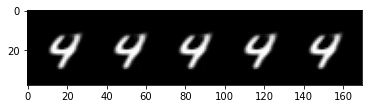

tensor([[ 0.9166, -0.0172]])


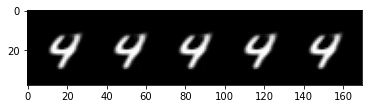

In [58]:
import model
import helper


def generate_x_images_of_one_image_refactor(images, pick_model, nr_of_gen=5, factor=1):
    with torch.no_grad():
        image_rec, mu, sigma = pick_model(images)
        eps = torch.randn(nr_of_gen, 2) * factor
        z = mu + sigma * eps
        new_images = pick_model.decode(z)
        print_grid_refactor(images=new_images.view(-1, 1, 28, 28))


def generate_x_images_of_one_image_towards_counterfactual(images, pick_model, nr_of_gen=5, factor=1):
    with torch.no_grad():
        image_rec, mu, sigma = pick_model(images)
        eps = torch.randn(nr_of_gen, 2) * factor
        z = mu + sigma * eps
        new_images = pick_model.decode(z)
        print_grid_refactor(images=new_images.view(-1, 1, 28, 28))


def generate_x_images_towards_linear_border(images, pick_model, nr_of_gen=5, factor=1):
    with torch.no_grad():
        steps = torch.empty(nr_of_gen)
        ones = torch.ones(nr_of_gen)
        torch.fill(steps, factor)
        image_rec, mu, sigma = pick_model(images)
        print(mu)
        mu = mu.squeeze(dim=0)
        sigma = sigma.squeeze(dim=0)
        (z) = mu[0]*ones + sigma[0]*0, mu[1]+sigma[1]*steps
        (z) = mu[0]*ones, mu[1]+sigma[1]*steps
        z = torch.vstack(z)
        z = torch.t(z)
        new_images = pick_model.decode(z)
        print_grid_refactor(images=new_images.view(-1, 1, 28, 28))


model_copy = model.VaeFinal_only_one_hidden_copy()
model_copy = helper.import_model_name_weights_copy(model_x=model_copy, activate_eval=True)

img_ = img_4_batch[1, :, :, :]
plt.imshow(img_[0, :, :])
for factor_step in range(-4, 4):
    generate_x_images_towards_linear_border(images=img_, nr_of_gen=5, pick_model=model_copy, factor=factor_step)